In [1]:
import os
import pandas as pd
import numpy as np

# Folder containing the Excel files
input_folder = "New Data"  # Replace with your folder path
output_folder = "transformed_data"  # Output folder name

# Create the output folder if it doesn't exist
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# Iterate through all files in the folder
for filename in os.listdir(input_folder):
    # Build the full file path
    file_path = os.path.join(input_folder, filename)
    
    # Skip non-Excel files and folders (like `.ipynb_checkpoints`)
    if not filename.endswith(".xlsx") or os.path.isdir(file_path):
        continue
    
    # Load the data without skipping any rows initially
    data = pd.read_excel(file_path)

    # Find "Channel 4" column in a case-insensitive way
    channel_4_column = None
    for col in data.columns:
        if col.strip().lower() == "channel 4":
            channel_4_column = col
            break
    
    if channel_4_column is None:
        print(f"'Channel 4' column not found in file: {filename}")
        continue

    # Detect the first row in "Channel 4" with a numeric value
    start_index = data[channel_4_column].first_valid_index()
    if start_index is None:
        print(f"No numeric data found in 'Channel 4' for file: {filename}")
        continue

    # Extract data starting from the first numeric value
    amplitude = pd.to_numeric(data[channel_4_column].iloc[start_index:], errors='coerce').dropna()
    
    # Calculate the number of rows needed for reshaping
    samples_per_second = 8192
    num_rows = len(amplitude) // samples_per_second

    # Reshape the amplitude data to (num_rows, samples_per_second) and transpose
    amplitude_1sec = np.reshape(amplitude.values[:num_rows * samples_per_second], (num_rows, samples_per_second))
    amplitude_1sec_transposed = amplitude_1sec.T

    # Save the transposed data to a new Excel file in the output folder
    output_file = os.path.join(output_folder, filename.replace(".xlsx", "_processed.xlsx"))
    df_output = pd.DataFrame(amplitude_1sec_transposed)
    df_output.to_excel(output_file, index=False, header=False)

print("Data successfully saved for all files.")


Data successfully saved for all files.


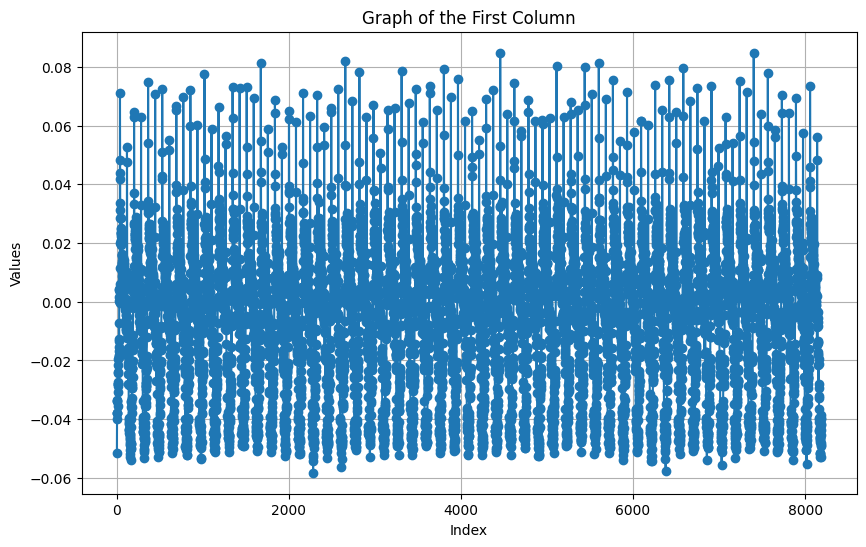

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_first_column_from_excel(file_name):
    # Load the Excel file
    try:
        data = pd.read_excel(file_name)
    except Exception as e:
        print(f"Error reading the Excel file: {e}")
        return
    
    # Check if there are enough columns
    if data.shape[1] < 1:
        print("The file doesn't have enough columns.")
        return
    
    # Plot the first column
    plt.figure(figsize=(10, 6))
    plt.plot(data.iloc[:, 0], marker='o', linestyle='-')
    plt.xlabel("Index")
    plt.ylabel("Values")
    plt.title("Graph of the First Column")
    plt.grid(True)
    plt.show()

# Example usage
file_name = "C:\\Users\\LENOVO\\Desktop\\transformed_data\\500_FGBSBOTHFB_processed.xlsx"  # Replace with your Excel file name
plot_first_column_from_excel(file_name)

In [2]:
import os
import pandas as pd
import numpy as np

# Define input and output folders
processed_folder = "transformed_data"  # Folder with 100x8192 processed files
features_folder = "features_data"      # Folder to store individual feature files
combined_folder = "combined_features"  # Folder to store the final combined file

# Create the output folders if they don't exist
if not os.path.exists(features_folder):
    os.makedirs(features_folder)
if not os.path.exists(combined_folder):
    os.makedirs(combined_folder)

# List to accumulate data for the final combined file
combined_data = []

# Iterate over each processed file in the transformed data folder
for filename in os.listdir(processed_folder):
    if filename.endswith(".xlsx") and not filename.startswith("."):
        file_path = os.path.join(processed_folder, filename)
        
        # Load the processed 100x8192 data file
        data = pd.read_excel(file_path, header=None)  # No headers in the reshaped file
        
        # Calculate the top 8 features for each of the 100 columns
        features = {
            'Mean': data.mean(axis=0),
            'Median': data.median(axis=0),
            'StdDev': data.std(axis=0),
            'Variance': data.var(axis=0),
            'RMS': np.sqrt((data**2).mean(axis=0)),
            'Max': data.max(axis=0),
            'Skewness': data.skew(axis=0),
            'Kurtosis': data.kurt(axis=0)
        }

        # Create a DataFrame for the calculated features (8 columns x 100 rows)
        features_df = pd.DataFrame(features)
        
        # Save individual feature files in the features folder
        feature_file_path = os.path.join(features_folder, filename.replace("_processed.xlsx", "_features.xlsx"))
        features_df.to_excel(feature_file_path, index=False)
        
        # Add file name as an additional column for combined file
        features_df['FileName'] = filename.replace("_processed.xlsx", "")
        combined_data.append(features_df)

# Combine all feature data from individual files into a single DataFrame
combined_df = pd.concat(combined_data, ignore_index=True)

# Save the combined features file in the combined folder
combined_file_path = os.path.join(combined_folder, "combined_features.xlsx")
combined_df.to_excel(combined_file_path, index=False)

print("Feature extraction and combination complete.")


Feature extraction and combination complete.


       Mean    Median    StdDev  Variance       RMS       Max  Skewness  \
0 -0.006870 -0.002477  0.025704  0.000661  0.026605  0.082647  0.066856   
1 -0.006719 -0.002147  0.025754  0.000663  0.026614  0.083398  0.055893   
2 -0.006834 -0.002375  0.025916  0.000672  0.026800  0.083174  0.062748   
3 -0.006523 -0.001927  0.025871  0.000669  0.026679  0.083927  0.058378   
4 -0.006088 -0.001717  0.025892  0.000670  0.026597  0.086780  0.065410   

   Kurtosis         FileName  
0 -0.277488  1000_FGBSBOTHFB  
1 -0.324597  1000_FGBSBOTHFB  
2 -0.306289  1000_FGBSBOTHFB  
3 -0.302583  1000_FGBSBOTHFB  
4 -0.297959  1000_FGBSBOTHFB  
SVM Cross-validation accuracy: 96.37500000000001
Random Forest Cross-validation accuracy: 98.5
SVM Predictions for the new RPM data:
['Fault - Outer Race' 'Fault - Inner and Outer Race'
 'Fault - Inner and Outer Race' 'Fault - Inner and Outer Race'
 'Fault - Inner and Outer Race' 'Fault - Inner and Outer Race'
 'Fault - Inner and Outer Race' 'Fault - Inner and 

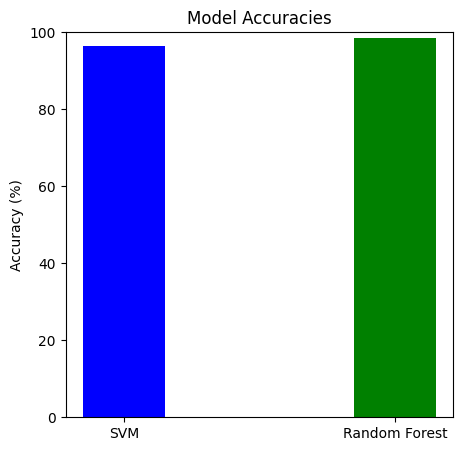

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Load training data
data = pd.read_excel("C:\\Users\\LENOVO\\Desktop\\combined_features\\combined_features.xlsx")  # Update with the correct path to your file

# Display the first few rows to inspect the data
print(data.head())

# Define a function to create labels based on file names
def label_from_filename(filename):
    if "GGBSGB" in filename:
        return "Good"
    elif "FGBSBOTHFB" in filename:
        return "Fault - Inner and Outer Race"
    elif "FGBSIRFB" in filename:
        return "Fault - Inner Race"
    elif "FGBSORFB" in filename:
        return "Fault - Outer Race"
    else:
        return "Unknown"

# Apply the labeling function to the 'FileName' column
data['Label'] = data['FileName'].apply(label_from_filename)

# Separate features and labels
X = data.drop(columns=["FileName", "Label"], errors='ignore')  # Drop non-feature columns
y = data["Label"]

# Preprocess the data: standardize features for generalization across RPMs
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize models
svm_model = SVC(kernel='rbf', gamma='scale', C=1)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Cross-validation for SVM
svm_scores = cross_val_score(svm_model, X_scaled, y, cv=5)
svm_accuracy = np.mean(svm_scores) * 100
print("SVM Cross-validation accuracy:", svm_accuracy)

# Train the SVM model on the full training data
svm_model.fit(X_scaled, y)

# Cross-validation for Random Forest
rf_scores = cross_val_score(rf_model, X_scaled, y, cv=5)
rf_accuracy = np.mean(rf_scores) * 100
print("Random Forest Cross-validation accuracy:", rf_accuracy)

# Train the Random Forest model on the full training data
rf_model.fit(X_scaled, y)

# To test on new RPM data, load and process the test data
test_data = pd.read_excel("C:\\Users\\LENOVO\\Desktop\\features_data\\1000_FGBSBOTHFB_features.xlsx")  # Update with your test file path
X_test = test_data.drop(columns=["FileName", "Label"], errors='ignore')  # Drop any non-feature columns
y_test = test_data["Label"] if "Label" in test_data.columns else None  # Optional: true labels if available

# Scale the test data using the same scaler
X_test_scaled = scaler.transform(X_test)

# Make predictions on the new data for SVM
svm_predictions = svm_model.predict(X_test_scaled)

# Make predictions on the new data for Random Forest
rf_predictions = rf_model.predict(X_test_scaled)

# If you have true labels for the test data, evaluate performance
if y_test is not None:
    print("SVM Classification Report on Test Data:")
    print(classification_report(y_test, svm_predictions))
    
    print("Random Forest Classification Report on Test Data:")
    print(classification_report(y_test, rf_predictions))
else:
    print("SVM Predictions for the new RPM data:")
    print(svm_predictions)
    
    print("Random Forest Predictions for the new RPM data:")
    print(rf_predictions)

# Plotting the accuracies of SVM and Random Forest
model_names = ['SVM', 'Random Forest']
accuracies = [svm_accuracy, rf_accuracy]

# Plot with specified bar width and spacing
fig, ax = plt.subplots(figsize=(5, 5))  # Adjust the figure size for appropriate thickness

bar_width = 0.3
positions = np.arange(len(model_names))  # Create positions for each bar

ax.bar(positions, accuracies, color=['blue', 'green'], width=bar_width)
ax.set_ylim(0, 100)  # Set y-axis limit from 0 to 100 for better visualization
ax.set_xticks(positions)
ax.set_xticklabels(model_names)
ax.set_ylabel('Accuracy (%)')
ax.set_title('Model Accuracies')

plt.show()


NameError: name 'svm_model' is not defined